# **Importing libraries**

In [164]:
import numpy as np
import matplotlib.pyplot as plt


**Rosenbrock function**

In [165]:
def func1(x,y):
  return (1-x)**2+100*(y-x**2)**2

**sin(1/x)**

In [166]:
def func2(x):
    if x == 0:
        return 1.0  # Define the function value at x=0 as 1
    else:
        return np.sin(1/x)

In [167]:
#gradient of function 1
def grad_func1(x,y):
  dfdx=-2*(1-x)-400*x*(y-x**2)
  dfdy=200*(y-x**2)
  return np.array([dfdx,dfdy]) #creates an array having df/dx and df/dy


In [168]:
#gradient of function 2
def grad_func2(x):
    if x == 0:
        return np.array([0.0])  # Define the gradient at x=0 as 0
    else:
        dfdx = -1/(x**2) * np.cos(1/x)
        return np.array([dfdx])


In [169]:
#Vanilla gradient descent
def gradient_descent(func, grad_func, x_init, lr, num_iters):
  x=x_init
  trajectory=[x]
  for i in range(num_iters):
    grad=grad_func(*x)
    x=x-lr*grad
    trajectory.append(x);
  return np.array(trajectory)


In [170]:
#Stochastic gradient descent with momentum
def stochastic_gradient_descent(func, grad_func, x_init, lr, num_iters, momentum=0.9):
    x = np.array(x_init, dtype=float)
    velocity = np.zeros_like(x)
    trajectory = [x.copy()]

    for i in range(num_iters):
        grad = np.array(grad_func(*x))
        velocity = momentum * velocity - lr * grad  # Update velocity with momentum
        x += velocity

        trajectory.append(x.copy())

    return np.array(trajectory)

In [171]:
#adam
def adam(func, grad_func, x_init, lr, num_iters, beta1=0.9, beta2=0.999, epsilon=1e-8):
  x=x_init
  m=np.zeros_like(x) #to create array with o's having same dimensions as x
  v=np.zeros_like(x)
  trajectory=[x]
  for i in range(num_iters):
    grad=grad_func(*x)
    m=beta1*m+(1-beta1)*grad
    v=beta2*v+(1-beta2)*grad**2
    m_hat=m/(1-beta1**(i+1))
    v_hat=v/(1-beta2**(i+1))
    x=x-lr*m_hat/(np.sqrt(v_hat)+epsilon)
    trajectory.append(x);

  return np.array(trajectory)


In [172]:
#rmsprop
def rmsprop(func, grad_func, x_init, lr, num_iters, beta=0.9, epsilon=1e-8):
  x=x_init
  s=np.zeros_like(x)
  trajectory=[x]
  for i in range(num_iters):
    grad=grad_func(*x)
    s=beta*s+(1-beta)*grad**2
    x=x-lr*grad/(np.sqrt(s)+epsilon)
    trajectory.append(x);
  return np.array(trajectory)

In [173]:
#adagrad
def adagrad(func, grad_func, x_init, lr, num_iters, epsilon=1e-8):
 x=x_init
 s=np.zeros_like(x)
 trajectory=[x]
 for i in range(num_iters):
  grad=grad_func(*x)
  s=s+grad**2
  x=x-lr*grad/(np.sqrt(s)+epsilon)
  trajectory.append(x);
 return np.array(trajectory)

In [174]:
x_init=np.array([-1.2, 1.2]) #intial guess
learning_rates= [0.01,0.05,0.1] #learning rates


# **Optimising func 1**

 **Optimising using gradient descent**

In [175]:
trajectory=gradient_descent(func1,grad_func1,x_init,learning_rates[0],1000)
print(trajectory)

#result--> not optimised

[[-1.2         1.2       ]
 [-0.004       1.68      ]
 [-0.01079974 -1.679968  ]
 ...
 [        nan         nan]
 [        nan         nan]
 [        nan         nan]]


<ipython-input-167-570579ee22ef>:3: RuntimeWarning: overflow encountered in scalar power
  dfdx=-2*(1-x)-400*x*(y-x**2)
<ipython-input-167-570579ee22ef>:4: RuntimeWarning: overflow encountered in scalar power
  dfdy=200*(y-x**2)
<ipython-input-167-570579ee22ef>:3: RuntimeWarning: invalid value encountered in scalar subtract
  dfdx=-2*(1-x)-400*x*(y-x**2)
<ipython-input-167-570579ee22ef>:4: RuntimeWarning: invalid value encountered in scalar subtract
  dfdy=200*(y-x**2)


In [176]:
trajectory=gradient_descent(func1,grad_func1,x_init,learning_rates[1],1000)
print(trajectory)

#result--> not optimised

[[-1.20000000e+00  1.20000000e+00]
 [ 4.78000000e+00  3.60000000e+00]
 [-1.83574504e+03  1.96084000e+02]
 ...
 [            nan             nan]
 [            nan             nan]
 [            nan             nan]]


<ipython-input-167-570579ee22ef>:3: RuntimeWarning: overflow encountered in scalar multiply
  dfdx=-2*(1-x)-400*x*(y-x**2)
<ipython-input-169-e16e92c8ba7f>:7: RuntimeWarning: invalid value encountered in subtract
  x=x-lr*grad


In [177]:
trajectory=gradient_descent(func1,grad_func1,x_init,learning_rates[2],1000)
print(trajectory)

#result--> not optimised

[[-1.2000000e+00  1.2000000e+00]
 [ 1.0760000e+01  6.0000000e+00]
 [-4.7239471e+04  2.2015520e+03]
 ...
 [           nan            nan]
 [           nan            nan]
 [           nan            nan]]


<ipython-input-167-570579ee22ef>:3: RuntimeWarning: overflow encountered in scalar multiply
  dfdx=-2*(1-x)-400*x*(y-x**2)
<ipython-input-169-e16e92c8ba7f>:7: RuntimeWarning: invalid value encountered in subtract
  x=x-lr*grad


 **Optimising using SGD**

In [178]:
trajectory=stochastic_gradient_descent(func1,grad_func1,x_init,learning_rates[0],1000)
print(trajectory)

#result--> not optimised

[[-1.2         1.2       ]
 [-0.004       1.68      ]
 [ 1.06560026 -1.247968  ]
 ...
 [        nan         nan]
 [        nan         nan]
 [        nan         nan]]


<ipython-input-167-570579ee22ef>:3: RuntimeWarning: overflow encountered in scalar power
  dfdx=-2*(1-x)-400*x*(y-x**2)
<ipython-input-167-570579ee22ef>:4: RuntimeWarning: overflow encountered in scalar power
  dfdy=200*(y-x**2)
<ipython-input-167-570579ee22ef>:3: RuntimeWarning: invalid value encountered in scalar subtract
  dfdx=-2*(1-x)-400*x*(y-x**2)
<ipython-input-167-570579ee22ef>:4: RuntimeWarning: invalid value encountered in scalar subtract
  dfdy=200*(y-x**2)


In [179]:
trajectory=stochastic_gradient_descent(func1,grad_func1,x_init,learning_rates[1],1000)
print(trajectory)

#result--> not optimised

[[-1.20000000e+00  1.20000000e+00]
 [ 4.78000000e+00  3.60000000e+00]
 [-1.83036304e+03  1.98244000e+02]
 ...
 [            nan             nan]
 [            nan             nan]
 [            nan             nan]]


<ipython-input-167-570579ee22ef>:3: RuntimeWarning: overflow encountered in scalar multiply
  dfdx=-2*(1-x)-400*x*(y-x**2)
<ipython-input-170-24e944d7d85f>:9: RuntimeWarning: invalid value encountered in subtract
  velocity = momentum * velocity - lr * grad  # Update velocity with momentum


In [180]:
trajectory=stochastic_gradient_descent(func1,grad_func1,x_init,learning_rates[2],1000)
print(trajectory)

#result--> not optimised

[[-1.2000000e+00  1.2000000e+00]
 [ 1.0760000e+01  6.0000000e+00]
 [-4.7228707e+04  2.2058720e+03]
 ...
 [           nan            nan]
 [           nan            nan]
 [           nan            nan]]


<ipython-input-167-570579ee22ef>:3: RuntimeWarning: overflow encountered in scalar multiply
  dfdx=-2*(1-x)-400*x*(y-x**2)
<ipython-input-170-24e944d7d85f>:9: RuntimeWarning: invalid value encountered in subtract
  velocity = momentum * velocity - lr * grad  # Update velocity with momentum


**Optimising using Adam**

In [181]:
trajectory= adam(func1,grad_func1,x_init,learning_rates[0],1000)
print(trajectory)

#result --> converging but needs high iterations

[[-1.2         1.2       ]
 [-1.19        1.21      ]
 [-1.18006963  1.21993175]
 ...
 [ 0.52316993  0.27222777]
 [ 0.52429972  0.27341368]
 [ 0.52542612  0.27459859]]


In [182]:
trajectory=adam(func1,grad_func1,x_init,learning_rates[1],1000)
print(trajectory)

#result --> high learning rate, needed very less iterations to converge

[[-1.2         1.2       ]
 [-1.15        1.25      ]
 [-1.1068673   1.29283448]
 ...
 [ 0.99292943  0.98588614]
 [ 0.9929828   0.9859923 ]
 [ 0.9930358   0.98609773]]


In [183]:
trajectory=adam(func1,grad_func1,x_init,learning_rates[2],1000)
print(trajectory)

#result --> better convergence , as learning rate is high

[[-1.2         1.2       ]
 [-1.1         1.3       ]
 [-1.05688158  1.33659579]
 ...
 [ 0.99985057  0.99970067]
 [ 0.9998527   0.99970495]
 [ 0.99985481  0.99970917]]


**Optimising using rmsprop**

In [184]:
trajectory=rmsprop(func1,grad_func1,x_init,learning_rates[0],10000)
print(trajectory)

#result --> converging but needs high iterations

[[-1.2         1.2       ]
 [-1.16837722  1.23162278]
 [-1.15234789  1.24761616]
 ...
 [ 0.99014392  0.96553353]
 [ 0.98014392  0.97553354]
 [ 0.99014393  0.96553355]]


In [185]:
trajectory=rmsprop(func1,grad_func1,x_init,learning_rates[1],1000)
print(trajectory)

#result --> not converging--> oscillating !! at this learning rate

[[-1.2         1.2       ]
 [-1.04188612  1.35811388]
 [-1.15169462  1.23676311]
 ...
 [ 0.70713823  0.44079826]
 [ 0.65713574  0.49089203]
 [ 0.70724575  0.44094582]]


In [186]:
trajectory=rmsprop(func1,grad_func1,x_init,learning_rates[2],1000)
print(trajectory)

#result --> not converging --> oscillating !! at this learning rate

[[-1.2         1.2       ]
 [-0.88377223  1.51622777]
 [-1.17289962  1.21415494]
 ...
 [ 0.29999996  0.01499998]
 [ 0.19999996  0.11499998]
 [ 0.29999996  0.01499998]]


**optimsing using adagrad**

In [187]:
trajectory=adagrad(func1,grad_func1,x_init,learning_rates[0],1000000)
print(trajectory)

#result --> converging but very slow convergence --> lots of iterations

[[-1.2         1.2       ]
 [-1.19        1.21      ]
 [-1.18349321  1.21651494]
 ...
 [ 0.99999995  0.9999999 ]
 [ 0.99999995  0.9999999 ]
 [ 0.99999995  0.9999999 ]]


In [188]:
trajectory=adagrad(func1,grad_func1,x_init,learning_rates[1],100000)
print(trajectory)

#result --> converging at high iterations

[[-1.2         1.2       ]
 [-1.15        1.25      ]
 [-1.13498638  1.26445885]
 ...
 [ 1.          1.        ]
 [ 1.          1.        ]
 [ 1.          1.        ]]


In [189]:
trajectory=adagrad(func1,grad_func1,x_init,learning_rates[2],10000)
print(trajectory)

#result--> converging at little less iterations than other learning rates but still rmsprop is slower than other methods

[[-1.2         1.2       ]
 [-1.1         1.3       ]
 [-1.12838153  1.26488766]
 ...
 [ 0.99711285  0.99422496]
 [ 0.99711439  0.99422803]
 [ 0.99711593  0.99423111]]


# **Results on func1**

<ipython-input-167-570579ee22ef>:3: RuntimeWarning: overflow encountered in scalar power
  dfdx=-2*(1-x)-400*x*(y-x**2)
<ipython-input-167-570579ee22ef>:4: RuntimeWarning: overflow encountered in scalar power
  dfdy=200*(y-x**2)
<ipython-input-167-570579ee22ef>:3: RuntimeWarning: invalid value encountered in scalar subtract
  dfdx=-2*(1-x)-400*x*(y-x**2)
<ipython-input-167-570579ee22ef>:4: RuntimeWarning: invalid value encountered in scalar subtract
  dfdy=200*(y-x**2)
<ipython-input-167-570579ee22ef>:3: RuntimeWarning: overflow encountered in scalar multiply
  dfdx=-2*(1-x)-400*x*(y-x**2)
<ipython-input-169-e16e92c8ba7f>:7: RuntimeWarning: invalid value encountered in subtract
  x=x-lr*grad
<ipython-input-170-24e944d7d85f>:9: RuntimeWarning: invalid value encountered in subtract
  velocity = momentum * velocity - lr * grad  # Update velocity with momentum


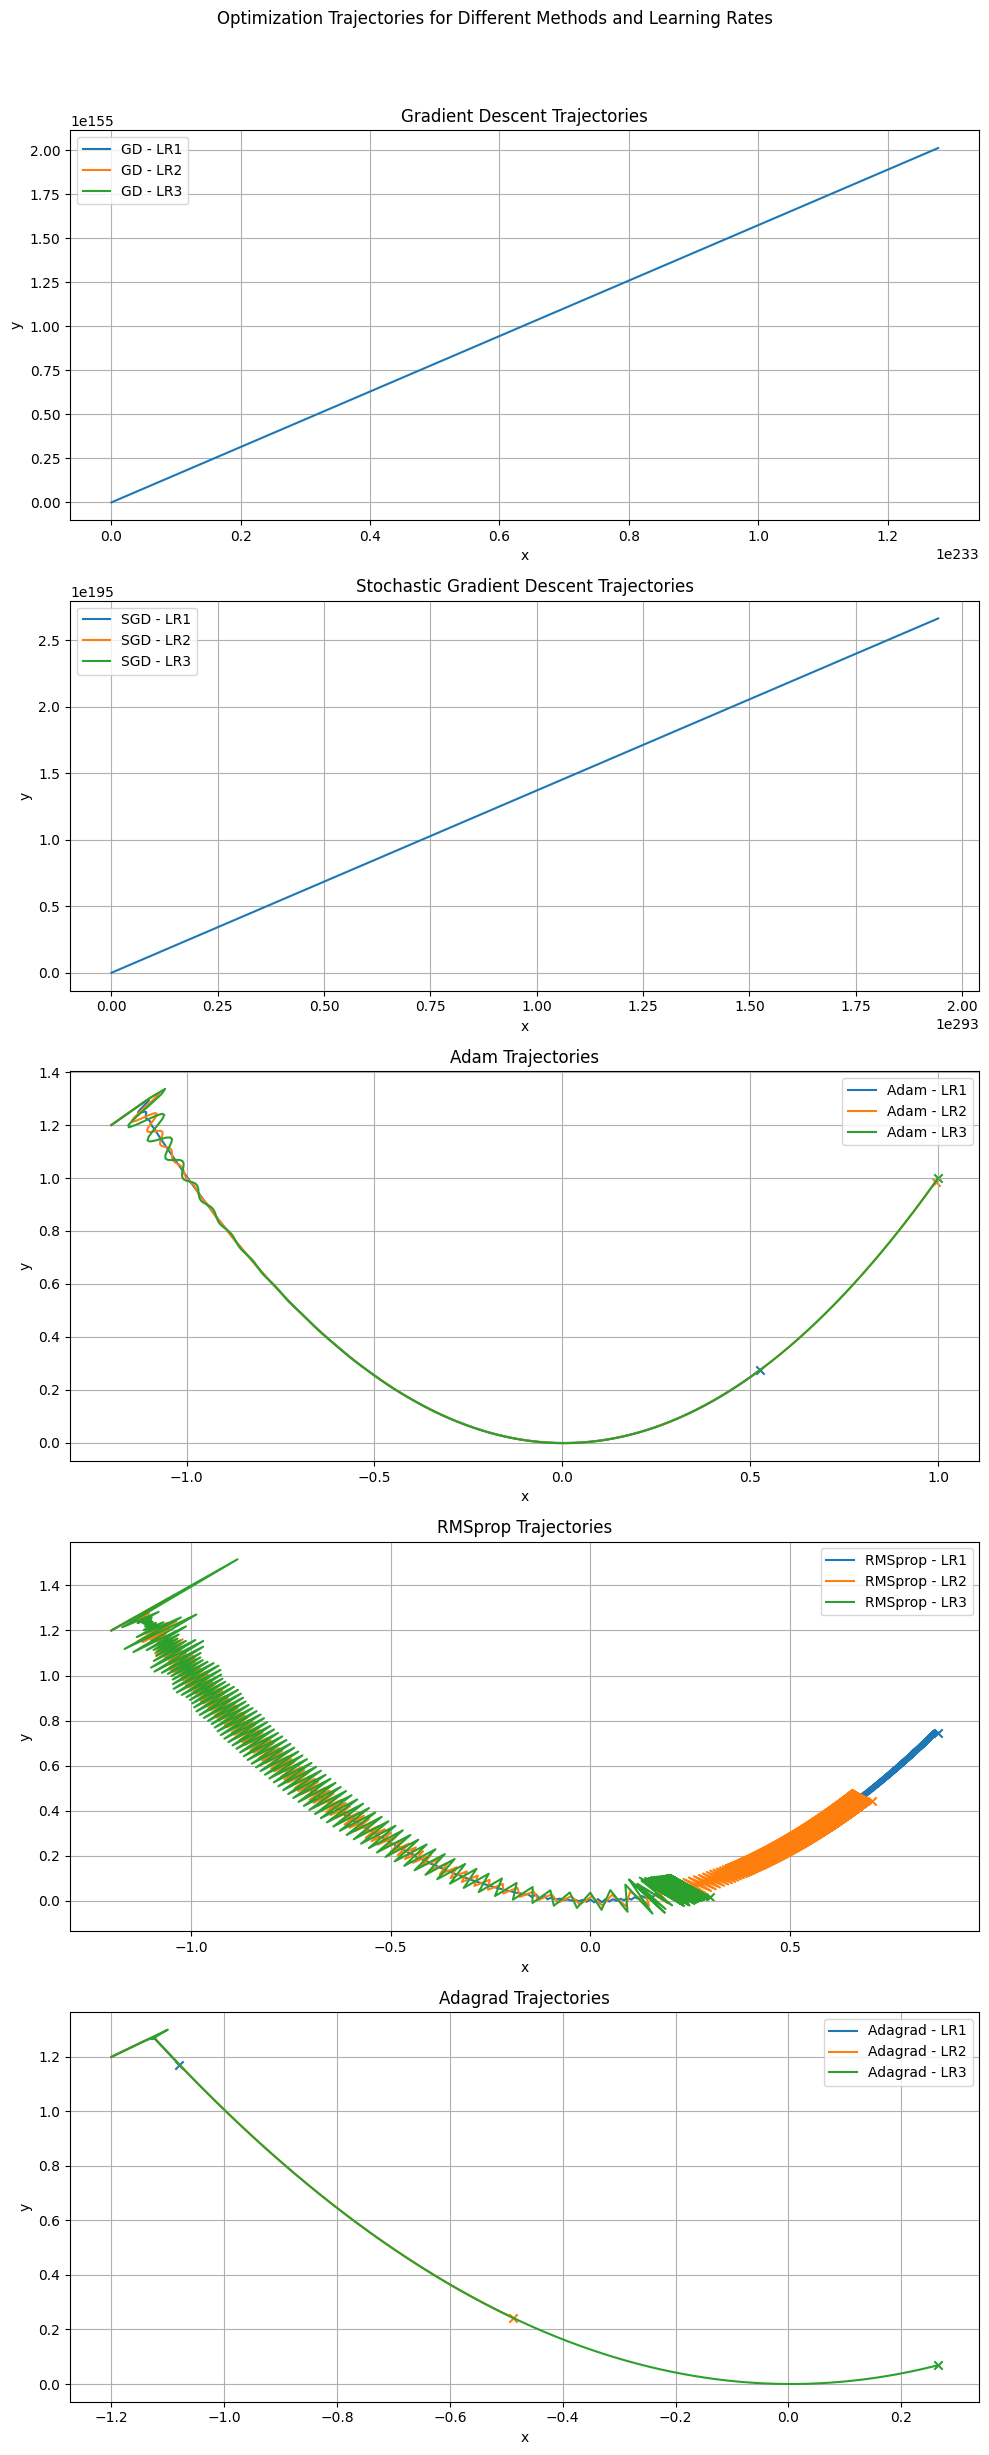

In [190]:
trajectory1=gradient_descent(func1,grad_func1,x_init,learning_rates[0],1000)
trajectory2=gradient_descent(func1,grad_func1,x_init,learning_rates[1],1000)
trajectory3=gradient_descent(func1,grad_func1,x_init,learning_rates[2],1000)
trajectory4=stochastic_gradient_descent(func1,grad_func1,x_init,learning_rates[0],1000)
trajectory5=stochastic_gradient_descent(func1,grad_func1,x_init,learning_rates[1],1000)
trajectory6=stochastic_gradient_descent(func1,grad_func1,x_init,learning_rates[2],1000)
trajectory7=adam(func1,grad_func1,x_init,learning_rates[0],1000)
trajectory8=adam(func1,grad_func1,x_init,learning_rates[1],1000)
trajectory9=adam(func1,grad_func1,x_init,learning_rates[2],1000)
trajectory10=rmsprop(func1,grad_func1,x_init,learning_rates[0],1000)
trajectory11=rmsprop(func1,grad_func1,x_init,learning_rates[1],1000)
trajectory12=rmsprop(func1,grad_func1,x_init,learning_rates[2],1000)
trajectory13=adagrad(func1,grad_func1,x_init,learning_rates[0],1000)
trajectory14=adagrad(func1,grad_func1,x_init,learning_rates[1],1000)
trajectory15=adagrad(func1,grad_func1,x_init,learning_rates[2],1000)



def plot_trajectories_separately(trajectories, labels, methods, title):
    num_methods = len(methods)
    fig, axes = plt.subplots(num_methods, 1, figsize=(10, 5 * num_methods))

    for i, method in enumerate(methods):
        for j in range(3):  # Assuming 3 learning rates per method
            axes[i].plot(trajectories[i * 3 + j][:, 0], trajectories[i * 3 + j][:, 1], label=labels[i * 3 + j])
            axes[i].scatter(trajectories[i * 3 + j][-1, 0], trajectories[i * 3 + j][-1, 1], marker='x')  # Mark the final point

        axes[i].set_xlabel('x')
        axes[i].set_ylabel('y')
        axes[i].set_title(f'{method} Trajectories')
        axes[i].legend()
        axes[i].grid(True)

    plt.suptitle(title)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Assuming trajectories are calculated as in your code
methods = ['Gradient Descent', 'Stochastic Gradient Descent', 'Adam', 'RMSprop', 'Adagrad']
plot_trajectories_separately(
    [trajectory1, trajectory2, trajectory3,
     trajectory4, trajectory5, trajectory6,
     trajectory7, trajectory8, trajectory9,
     trajectory10, trajectory11, trajectory12,
     trajectory13, trajectory14, trajectory15],
    ['GD - LR1', 'GD - LR2', 'GD - LR3',
     'SGD - LR1', 'SGD - LR2', 'SGD - LR3',
     'Adam - LR1', 'Adam - LR2', 'Adam - LR3',
     'RMSprop - LR1', 'RMSprop - LR2', 'RMSprop - LR3',
     'Adagrad - LR1', 'Adagrad - LR2', 'Adagrad - LR3'],
    methods,
    "Optimization Trajectories for Different Methods and Learning Rates"
)


# **func 2**

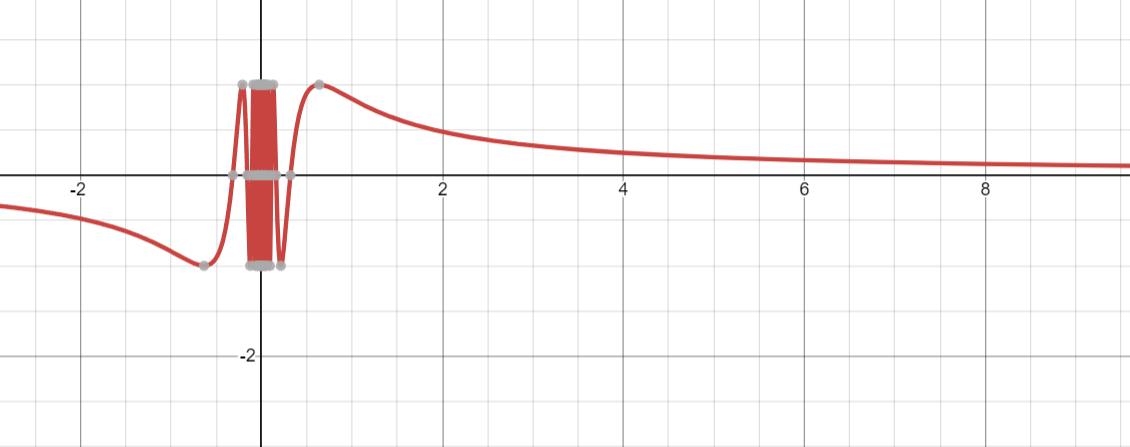

In [191]:
x_init=np.array([0.1]) #intial guess
learning_rates= [0.01,0.05,0.1] #learning rates

#Intial guess is getting mattered

**optimising using gradient descent**

In [192]:
trajectory=gradient_descent(func2,grad_func2,x_init,learning_rates[0],1000)
print(trajectory)

#result--> converging (-0.63 gives sin(1/x) as -1)

[[ 0.1       ]
 [-0.73907153]
 [-0.73511657]
 ...
 [-0.63661977]
 [-0.63661977]
 [-0.63661977]]


In [193]:
trajectory=gradient_descent(func2,grad_func2,x_init,learning_rates[1],1000)
print(trajectory)

#result--> converging (-0.63 gives sin(1/x) as -1)

[[ 0.1       ]
 [-4.09535765]
 [-4.09246491]
 ...
 [-0.63661977]
 [-0.63661977]
 [-0.63661977]]


In [194]:
trajectory=gradient_descent(func2,grad_func2,x_init,learning_rates[2],1000)
print(trajectory)

#result--> converging (-0.63 gives sin(1/x) as -1)

[[ 0.1       ]
 [-8.29071529]
 [-8.28927102]
 ...
 [-6.49160787]
 [-6.48926298]
 [-6.48691642]]


**optimising using Stochastic gradient descent**

In [195]:
trajectory=stochastic_gradient_descent(func2,grad_func2,x_init,learning_rates[0],1000)
print(trajectory)

#result--> converging (-0.63 gives sin(1/x) as -1)

[[ 0.1       ]
 [-0.73907153]
 [-1.49028094]
 ...
 [-6.29934068]
 [-6.29686935]
 [-6.29439612]]


In [196]:
trajectory=stochastic_gradient_descent(func2,grad_func2,x_init,learning_rates[1],1000)
print(trajectory)

#result--> converging (-0.63 gives sin(1/x) as -1)

[[  0.1       ]
 [ -4.09535765]
 [ -7.86828679]
 ...
 [-41.51981867]
 [-41.51952875]
 [-41.51923882]]


In [197]:
trajectory=stochastic_gradient_descent(func2,grad_func2,x_init,learning_rates[2],1000)
print(trajectory)

#result--> converging (-0.63 gives sin(1/x) as -1)

[[  0.1       ]
 [ -8.29071529]
 [-15.84091478]
 ...
 [-83.64163159]
 [-83.64148867]
 [-83.64134574]]


**optimsing using adam**

In [198]:
trajectory=adam(func2,grad_func2,x_init,learning_rates[0],1000)
print(trajectory)

#result--> converging (-0.63 gives sin(1/x) as -1)

[[0.1       ]
 [0.09      ]
 [0.08463888]
 ...
 [0.09094568]
 [0.09094568]
 [0.09094568]]


In [199]:
trajectory=adam(func2,grad_func2,x_init,learning_rates[1],1000)
print(trajectory)

#result--> converging (-0.63 gives sin(1/x) as -1)

[[ 0.1       ]
 [ 0.05      ]
 [ 0.06778395]
 ...
 [-0.48476841]
 [-0.48491378]
 [-0.48505901]]


In [200]:
trajectory=adam(func2,grad_func2,x_init,learning_rates[2],1000)
print(trajectory)

#result--> converging (-0.63 gives sin(1/x) as -1)

[[ 1.00000000e-01]
 [ 1.19179250e-11]
 [-7.44136823e-02]
 ...
 [-5.55889391e-01]
 [-5.55889391e-01]
 [-5.55889391e-01]]


**optimising  using rmsprop and adagrad**

In [201]:
trajectory=rmsprop(func2,grad_func2,x_init,learning_rates[0],1000)
print(trajectory)

trajectory=rmsprop(func2,grad_func2,x_init,learning_rates[1],1000)
print(trajectory)

trajectory=rmsprop(func2,grad_func2,x_init,learning_rates[2],1000)
print(trajectory)

trajectory=adagrad(func2,grad_func2,x_init,learning_rates[0],1000)
print(trajectory)

trajectory=adagrad(func2,grad_func2,x_init,learning_rates[1],1000)
print(trajectory)

trajectory=adagrad(func2,grad_func2,x_init,learning_rates[2],1000)
print(trajectory)


#everyone almost getting convergent

[[0.1       ]
 [0.06837722]
 [0.04361648]
 ...
 [0.06181686]
 [0.05176997]
 [0.06540827]]
[[ 0.1       ]
 [-0.05811388]
 [-0.09854539]
 ...
 [ 0.1990459 ]
 [ 0.2385074 ]
 [ 0.19352005]]
[[ 0.1       ]
 [-0.21622777]
 [-0.22366246]
 ...
 [-0.69804746]
 [-0.59804747]
 [-0.69804746]]
[[0.1       ]
 [0.09      ]
 [0.09167229]
 ...
 [0.09094568]
 [0.09094568]
 [0.09094568]]
[[0.1       ]
 [0.05      ]
 [0.09446895]
 ...
 [0.09094568]
 [0.09094568]
 [0.09094568]]
[[ 1.0000000e-01]
 [ 1.1917925e-11]
 [-1.0000000e-01]
 ...
 [-1.0000000e-01]
 [-1.0000000e-01]
 [-1.0000000e-01]]


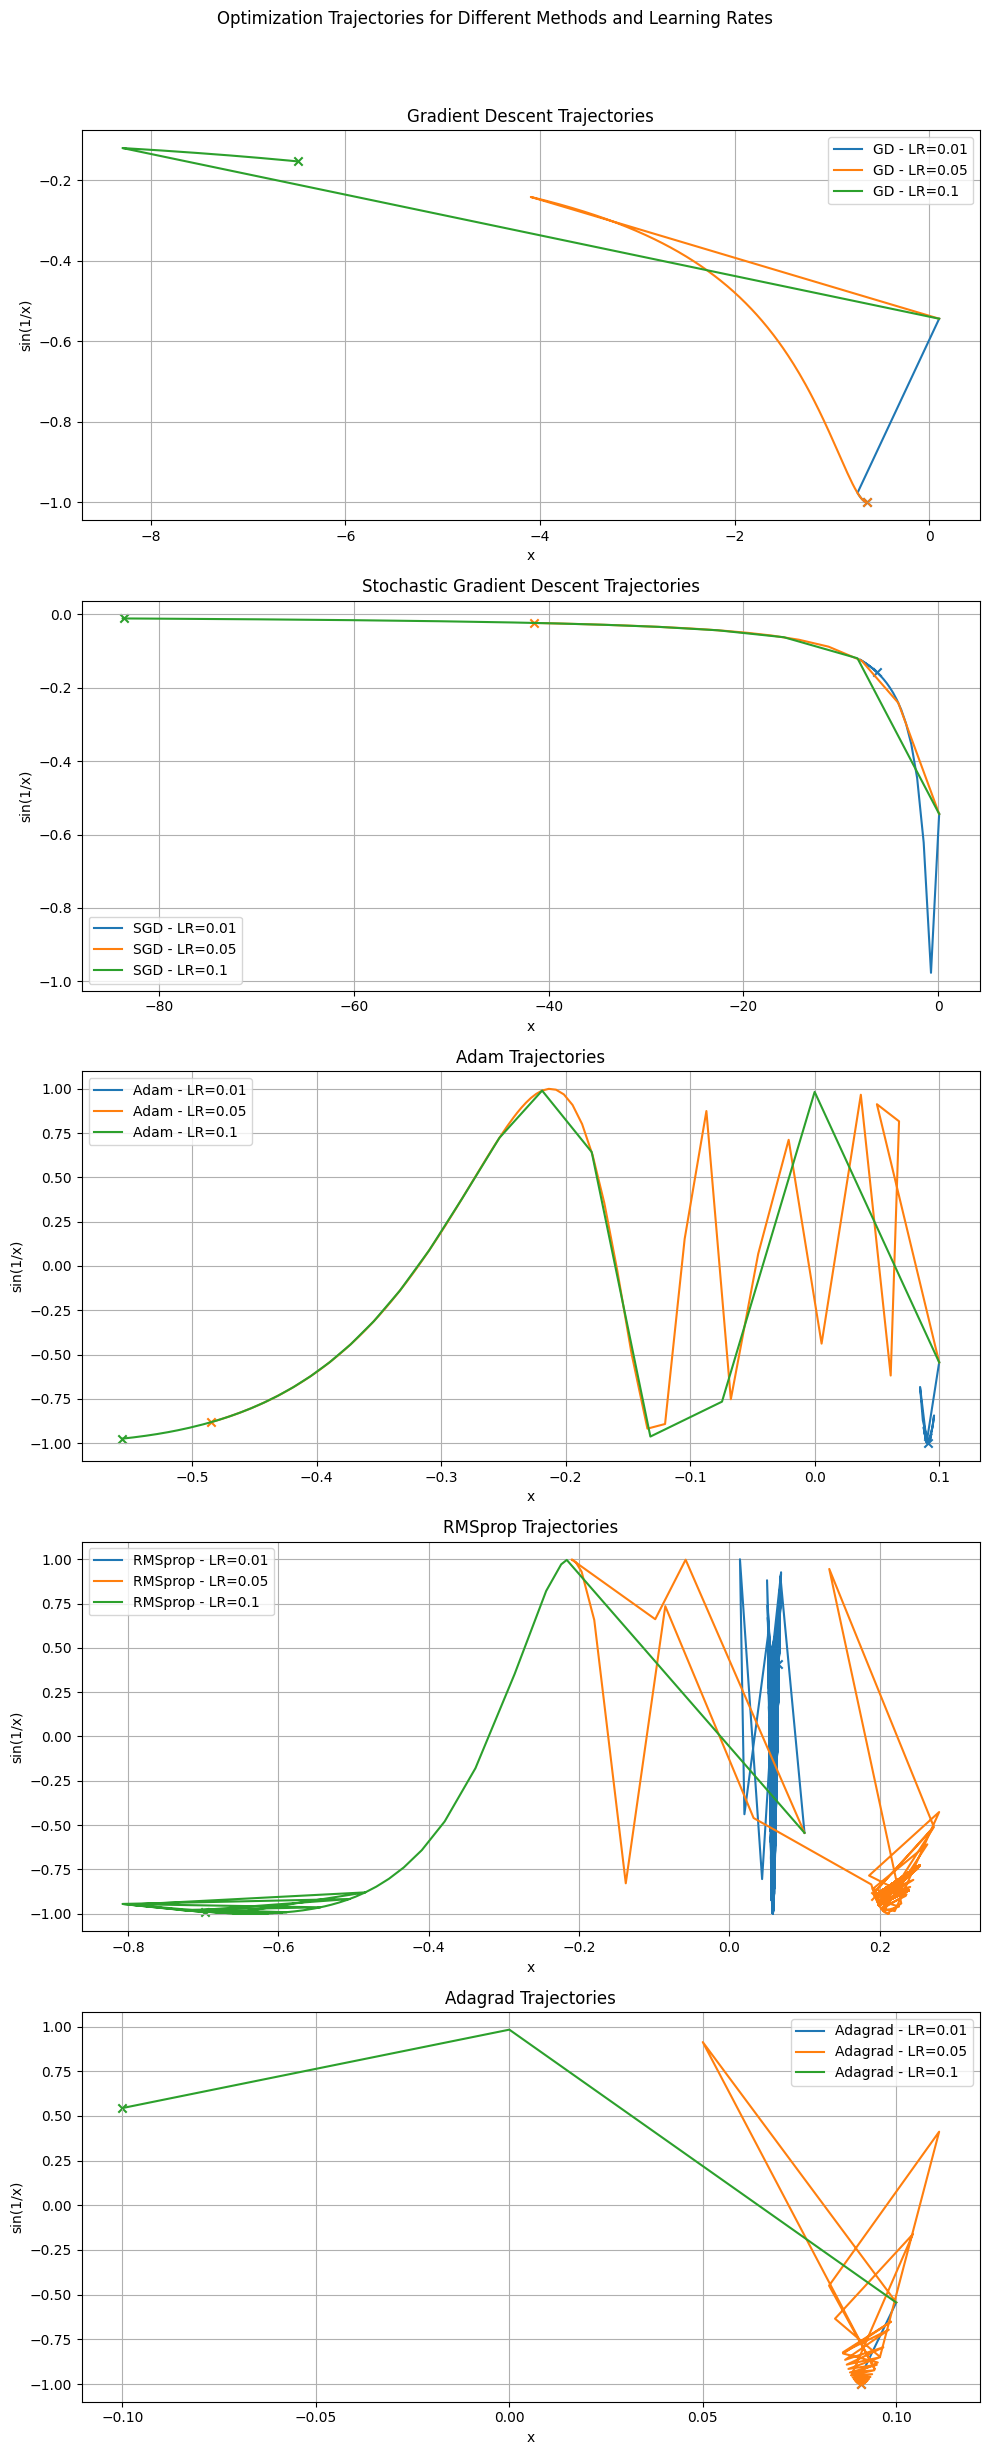

In [202]:
trajectory1=gradient_descent(func2,grad_func2,x_init,learning_rates[0],1000)
trajectory2=gradient_descent(func2,grad_func2,x_init,learning_rates[1],1000)
trajectory3=gradient_descent(func2,grad_func2,x_init,learning_rates[2],1000)
trajectory4=stochastic_gradient_descent(func2,grad_func2,x_init,learning_rates[0],1000)
trajectory5=stochastic_gradient_descent(func2,grad_func2,x_init,learning_rates[1],1000)
trajectory6=stochastic_gradient_descent(func2,grad_func2,x_init,learning_rates[2],1000)
trajectory7=adam(func2,grad_func2,x_init,learning_rates[0],1000)
trajectory8=adam(func2,grad_func2,x_init,learning_rates[1],1000)
trajectory9=adam(func2,grad_func2,x_init,learning_rates[2],1000)
trajectory10=rmsprop(func2,grad_func2,x_init,learning_rates[0],1000)
trajectory11=rmsprop(func2,grad_func2,x_init,learning_rates[1],1000)
trajectory12=rmsprop(func2,grad_func2,x_init,learning_rates[2],1000)
trajectory13=adagrad(func2,grad_func2,x_init,learning_rates[0],1000)
trajectory14=adagrad(func2,grad_func2,x_init,learning_rates[1],1000)
trajectory15=adagrad(func2,grad_func2,x_init,learning_rates[2],1000)



# Combine trajectories and labels
trajectories = [
    trajectory1, trajectory2, trajectory3,
    trajectory4, trajectory5, trajectory6,
    trajectory7, trajectory8, trajectory9,
    trajectory10, trajectory11, trajectory12,
    trajectory13, trajectory14, trajectory15
]

labels = [
    'GD - LR=0.01', 'GD - LR=0.05', 'GD - LR=0.1',
    'SGD - LR=0.01', 'SGD - LR=0.05', 'SGD - LR=0.1',
    'Adam - LR=0.01', 'Adam - LR=0.05', 'Adam - LR=0.1',
    'RMSprop - LR=0.01', 'RMSprop - LR=0.05', 'RMSprop - LR=0.1',
    'Adagrad - LR=0.01', 'Adagrad - LR=0.05', 'Adagrad - LR=0.1'
]

methods = ['Gradient Descent', 'Stochastic Gradient Descent', 'Adam', 'RMSprop', 'Adagrad']

# Plotting function
def plot_trajectories_separately(trajectories, labels, methods, title):
    num_methods = len(methods)
    fig, axes = plt.subplots(num_methods, 1, figsize=(10, 5 * num_methods))

    for i, method in enumerate(methods):
        for j in range(3):  # Assuming 3 learning rates per method
            traj = trajectories[i * 3 + j]
            x_values = traj[:, 0]
            y_values = np.sin(1 / x_values)  # Compute sin(1/x) for y values

            axes[i].plot(x_values, y_values, label=labels[i * 3 + j])
            axes[i].scatter(x_values[-1], y_values[-1], marker='x')  # Mark the final point

        axes[i].set_xlabel('x')
        axes[i].set_ylabel('sin(1/x)')
        axes[i].set_title(f'{method} Trajectories')
        axes[i].legend()
        axes[i].grid(True)

    plt.suptitle(title)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Call the plotting function
plot_trajectories_separately(
    trajectories,
    labels,
    methods,
    "Optimization Trajectories for Different Methods and Learning Rates"
)